In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns

In [2]:
dataFrame = pd.read_excel("../week2.xlsx")

In [3]:
#rename columns
dataFrame=dataFrame.rename(columns = {'Total DL (Bytes)' : 'totalDL','Total UL (Bytes)' : 'totalUL','Dur. (ms)' : 
                                      'dur','MSISDN/Number':'msisdn','Last Location Name':'location',
                                      'Handset Manufacturer':'manufacturer','Handset Type':'handset'
                                     })



## The following cell shows the top 10 users based on session frequency

In [4]:
sessionsCountData=dataFrame['msisdn'].value_counts()
sessionsCount=sessionsCountData.values.tolist()
msisdn=sessionsCountData.index.values
sessionPerUserDictionary = dict(zip(msisdn, sessionsCount))

for key,value in list(islice(sessionPerUserDictionary.items(), 10)):
    print(key,'----------',value,'Sessions')

33626320676.0 ---------- 18 Sessions
33625779332.0 ---------- 17 Sessions
33614892860.0 ---------- 17 Sessions
33659725664.0 ---------- 16 Sessions
33675877202.0 ---------- 15 Sessions
33760536639.0 ---------- 15 Sessions
33667163239.0 ---------- 13 Sessions
33786323068.0 ---------- 12 Sessions
33760413819.0 ---------- 12 Sessions
33604515716.0 ---------- 12 Sessions


## The following cell shows the top 10 users based on the total duration of all the sessions of each user

In [5]:
durationSumDF=dataFrame.groupby('msisdn')['dur'].sum()
duration = durationSumDF.values.tolist()
msisdn=durationSumDF.index.values
durationPerUser = dict(zip(msisdn, duration))

for key,value in list(islice(durationPerUser.items(), 10)):
    print(key,'----------',value,'Microseconds')

33601001722.0 ---------- 116720.0 Microseconds
33601001754.0 ---------- 181230.0 Microseconds
33601002511.0 ---------- 134969.0 Microseconds
33601007832.0 ---------- 49878.0 Microseconds
33601008617.0 ---------- 37104.0 Microseconds
33601010682.0 ---------- 253983.0 Microseconds
33601011634.0 ---------- 128360.0 Microseconds
33601011959.0 ---------- 86399.0 Microseconds
33601014694.0 ---------- 495702.0 Microseconds
33601020306.0 ---------- 124854.0 Microseconds


## The following cell shows the top 10 users based on the total duration of all the sessions of each user

In [6]:
sum_column = dataFrame["totalUL"] + dataFrame["totalDL"]
dataFrame["totalData"] = sum_column
totalDataDF=dataFrame.groupby('msisdn')['totalData'].sum()
totalData = totalDataDF.values.tolist()
msisdn=totalDataDF.index.values

totalDataUserDictionary = dict(zip(msisdn, totalData))

for key,value in list(islice(totalDataUserDictionary.items(), 10)):
    print(key,'----------',value,'Bytes')

33601001722.0 ---------- 878690574.0 Bytes
33601001754.0 ---------- 156859643.0 Bytes
33601002511.0 ---------- 595966483.0 Bytes
33601007832.0 ---------- 422320698.0 Bytes
33601008617.0 ---------- 1457410944.0 Bytes
33601010682.0 ---------- 615217221.0 Bytes
33601011634.0 ---------- 654723066.0 Bytes
33601011959.0 ---------- 332660357.0 Bytes
33601014694.0 ---------- 990132189.0 Bytes
33601020306.0 ---------- 732463761.0 Bytes


In [7]:
userEngagementDF=pd.DataFrame(columns=['MSISDN' ,'Session Frequency','Session Duration','Total Data'])
userEngagementDF['MSISDN']=durationPerUser.keys()

userEngagementDF['Session Frequency']=userEngagementDF['MSISDN'].map(sessionPerUserDictionary)
userEngagementDF['Session Duration']=userEngagementDF['MSISDN'].map(durationPerUser)
userEngagementDF['Total Data']= userEngagementDF['MSISDN'].map(totalDataUserDictionary)

userEngagementDF.sample(10)


,MSISDN,Session Frequency,Session Duration,Total Data
71162,3.366914e+10,1,86399.0,3.397966e+08
54850,3.366402e+10,1,86400.0,1.049028e+08
37612,3.365986e+10,2,326758.0,1.633256e+09
27167,3.365097e+10,1,49317.0,4.487819e+08
75742,3.367466e+10,2,65863.0,9.033408e+08
94322,3.376116e+10,2,172798.0,1.004671e+09
46224,3.366191e+10,1,60162.0,5.956203e+08
84491,3.369818e+10,1,162408.0,5.012869e+08
87007,3.369896e+10,2,167479.0,4.265032e+08
15813,3.363034e+10,2,172799.0,9.241270e+08


## The following cell prepares the dataframe for running k-means by normalizing the engagement metrics

In [8]:
x = userEngagementDF[['Session Frequency','Session Duration','Total Data']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled,columns=['Session Frequency','Session Duration','Total Data'])

## The following cell runs k-means algorithm on the engagement metrics.

In [9]:
from sklearn.cluster import KMeans
KMean_clust= KMeans(n_clusters=3, init='k-means++',max_iter=1000)
KMean_clust.fit(normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## The following cell assigns the corrosponding cluster labels to each entry in the dataframe

In [10]:
normalized['Cluster']= KMean_clust.labels_
normalized['MSISDN']= durationPerUser.keys()
normalized.sample(10)


,Session Frequency,Session Duration,Total Data,Cluster,MSISDN
7025,0.000000,0.002407,0.054924,0,3.361583e+10
46827,0.000000,0.008876,0.026078,0,3.366205e+10
26402,0.000000,0.004273,0.070778,0,3.365081e+10
12559,0.058824,0.013398,0.058818,0,3.362478e+10
12481,0.000000,0.006410,0.042596,0,3.362463e+10
10550,0.058824,0.012709,0.102369,2,3.362150e+10
32359,0.000000,0.004525,0.096364,0,3.365872e+10
35793,0.000000,0.004231,0.092774,0,3.365944e+10
78947,0.000000,0.000846,0.085478,0,3.368110e+10
12513,0.000000,0.001482,0.073832,0,3.362469e+10


## The following cell shows the sum of each engagement metric for each cluster.

In [50]:
metricDF=userEngagementDF[['Session Frequency','Session Duration','Total Data']]
metricDF['Cluster']=KMean_clust.labels_
clusteredSum = metricDF.groupby('Cluster').sum()

clusteredSum



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Session Frequency,Session Duration,Total Data
Cluster,,,
0,84593,8.683774e+09,4.021672e+13
1,17259,2.313816e+09,9.264643e+12
2,47083,4.621248e+09,2.435209e+13


## The following cell shows the minimum of each metric for each cluster

In [12]:
metricDF['Cluster']=KMean_clust.labels_
clusteredMin = metricDF.groupby('Cluster').min()
clusteredMin

,Session Frequency,Session Duration,Total Data
Cluster,,,
0,1,7142.0,3.324901e+07
1,3,46896.0,1.085994e+09
2,2,18235.0,2.842182e+08


## The following cell shows the maximum of each metric for each cluster

In [13]:
metricDF['Cluster']=KMean_clust.labels_
clusteredMax = metricDF.groupby('Cluster').max()
clusteredMax

,Session Frequency,Session Duration,Total Data
Cluster,,,
0,2,1573420.0,9.507607e+08
1,18,18553754.0,8.846226e+09
2,4,3174824.0,1.873330e+09


## The following cell shows the mean of each metric for each cluster

In [14]:
metricDF['Cluster']=KMean_clust.labels_
clusteredMean = metricDF.groupby('Cluster').mean()
clusteredMean

,Session Frequency,Session Duration,Total Data
Cluster,,,
0,1.042273,106993.096203,4.955116e+08
1,4.249938,569765.059345,2.281370e+09
2,2.176443,213620.305829,1.125692e+09


## The following tables show the total traffic of top 10 most engaged user per application.

In [15]:
# sum up download and upload data for each application
google = dataFrame['Google DL (Bytes)']+ dataFrame['Google UL (Bytes)']
email = dataFrame['Email DL (Bytes)']+ dataFrame['Email UL (Bytes)']
gaming = dataFrame['Gaming DL (Bytes)']+ dataFrame['Gaming UL (Bytes)']
youtube = dataFrame['Youtube DL (Bytes)']+ dataFrame['Youtube UL (Bytes)']
netflix = dataFrame['Netflix DL (Bytes)']+ dataFrame['Netflix UL (Bytes)']
social = dataFrame['Social Media DL (Bytes)']+ dataFrame['Social Media UL (Bytes)']

userEngagementDF['google']=google
userEngagementDF['email']=email
userEngagementDF['gaming']=gaming
userEngagementDF['youtube']=youtube
userEngagementDF['netflix']=netflix
userEngagementDF['social']=social

sumApplicationsDF=userEngagementDF.groupby('MSISDN')[['google','youtube','netflix','social','email','gaming']].sum()
sumApplicationsDF[['google']].sort_values(by ='google',ascending=False).head(10)

,google
MSISDN,
3.376053e+10,15528782.0
3.366249e+10,15517324.0
3.368482e+10,15508567.0
3.365113e+10,15507131.0
3.360993e+10,15506449.0
3.366356e+10,15506141.0
3.368841e+10,15493921.0
3.369997e+10,15483654.0
3.363264e+10,15481311.0


In [16]:
sumApplicationsDF[['youtube']].sort_values(by ='youtube',ascending=False).head(10)

,youtube
MSISDN,
3.366762e+10,45190078.0
3.376945e+10,45179008.0
3.362999e+10,45170035.0
3.366174e+10,45108826.0
3.362673e+10,45093369.0
3.366816e+10,45091533.0
3.376148e+10,45074469.0
3.366404e+10,45071796.0
3.363651e+10,45049792.0


In [17]:
sumApplicationsDF[['email']].sort_values(by ='email',ascending=False).head(10)

,email
MSISDN,
3.366137e+10,4518036.0
3.369935e+10,4513579.0
3.362843e+10,4513000.0
3.366468e+10,4512730.0
3.365267e+10,4510915.0
3.378103e+10,4510178.0
3.368142e+10,4507049.0
3.366147e+10,4504056.0
3.376363e+10,4502041.0


In [18]:
sumApplicationsDF[['netflix']].sort_values(by ='netflix',ascending=False).head(10)

,netflix
MSISDN,
3.366548e+10,45198153.0
3.366009e+10,45110360.0
3.365071e+10,45064738.0
3.366965e+10,45054355.0
3.366436e+10,45012951.0
3.366402e+10,44998954.0
3.363673e+10,44983646.0
3.369879e+10,44970634.0
3.365096e+10,44915543.0


## The following plot visualizes the top 3 most used applications based on total data transferred.

Text(0.5, 1.0, 'Top 3 Most Used Applications')

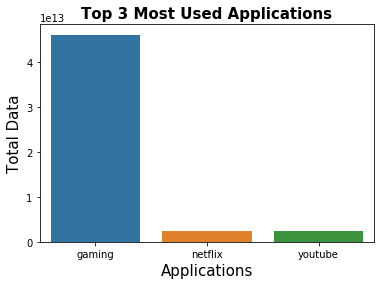

In [24]:
sumApplicationsDF=userEngagementDF.groupby('MSISDN')[['google','youtube','netflix','social','email','gaming']].sum()
largestApps=sumApplicationsDF[['google','youtube','netflix','social','email','gaming']].sum().nlargest(3)
ax=sns.barplot(largestApps.index, largestApps.values)
ax.set_xlabel('Applications', fontsize=15)
ax.set_ylabel('Total Data' , fontsize=15)
ax.set_title('Top 3 Most Used Applications', fontsize=15, fontweight='bold')

In [20]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized)
    distortions.append(kmeanModel.inertia_)



## The following plot of distortions shows that the elbow is at x=3. So the optimal number of clusters is 3.

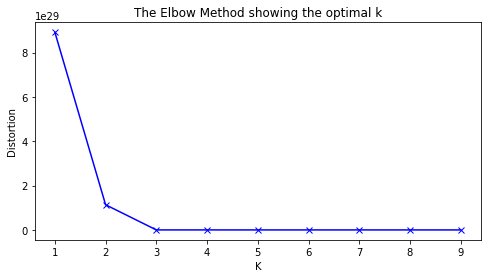

In [21]:
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## The following cell runs k-means algoritihm using the optimal number of clusters.

In [22]:
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(normalized)
normalized['Cluster']= KMean_clust.labels_
normalized

,Session Frequency,Session Duration,Total Data,Cluster,MSISDN
0,0.000000,0.005908,0.095931,0,3.360100e+10
1,0.000000,0.009387,0.014026,0,3.360100e+10
2,0.000000,0.006892,0.063851,0,3.360100e+10
3,0.000000,0.002304,0.044148,0,3.360101e+10
4,0.058824,0.001615,0.161598,2,3.360101e+10
...,...,...,...,...,...
106851,0.000000,0.000090,0.077317,0,3.379000e+10
106852,0.000000,0.007217,0.050727,0,3.379000e+10
106853,0.000000,0.046922,0.022566,0,3.197021e+12
106854,0.000000,0.013258,0.063887,0,3.370000e+14


0    81162
2    21633
1     4061
Name: Cluster, dtype: int64

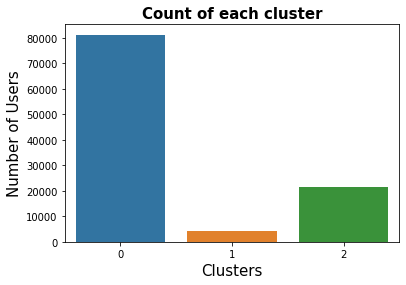

In [49]:
clusteredDF=normalized['Cluster'].value_counts()
ax=sns.barplot(clusteredDF.index, clusteredDF.values)
ax.set_xlabel('Clusters', fontsize=15)
ax.set_ylabel('Number of Users' , fontsize=15)
ax.set_title('Count of each cluster', fontsize=15, fontweight='bold')
clusteredDF